<div style="text-align:center; background-color:blue; padding:10px;">
  <h1 style="color:white;">EDA</h1>
</div>
<br>

<div style="text-align:left; background-color:gray; padding:0px;">
  <h1 style="color:white;">Import des librairies</h1>
</div>
<br>

In [1]:
# Visualisation de données
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")

# Librairies pour la connection à rds
# from connection import connection_with_sqlalchemy

<div style="text-align:left; background-color:gray; padding:0px;">
  <h1 style="color:white;">Récupération des données sur RDS</h1>
</div>
<br>

In [2]:
#///////////////////////////////////////////////////////////////////////////////
#           A FAIRE UNE SEULE FOIS LORS DU LANCEMENT DU NOTEBOOK
#///////////////////////////////////////////////////////////////////////////////

In [3]:
# Utilisation de sqlalchemy pour charger les données datagouv dans RDS
# Création de la connection

# engine = connection_with_sqlalchemy("datagouv")

# query="""
# SELECT 
#     V.*,
#     T.NAME_TYPE_BIEN,
#     C.NAME_COMMUNE,
#     D.Name_departement,
#     R.Name_region
# FROM VENTES V
# INNER JOIN TYPES_BIENS as T ON V.ID_TYPE_BIEN = T.ID_TYPE_BIEN
# INNER JOIN COMMUNES AS C ON V.ID_COMMUNE = C.ID_COMMUNE
# INNER JOIN DEPARTEMENTS AS D ON C.ID_DEPT = D.ID_DEPT
# INNER JOIN REGIONS R ON D.ID_REGION = R.ID_REGION;
# """
# df = pd.read_sql(query, engine)
# df.head(10)

In [4]:
# Fermeture de la connection
# engine.close()

In [5]:
# Sauvegarde du data frame en csv pour éviter de requêter toute la table plusieurs fois
# df.to_csv('datas_rds.csv', index=False)

<div style="text-align:left; background-color:gray; padding:0px;">
  <h1 style="color:white;">Visualisation des données disponibles RDS</h1>
</div>
<br>

In [6]:
df = pd.read_csv("datas_rds.csv", low_memory=False)
df.head()

,ID_VENTE,MONTANT,NUMERO_RUE,RUE,CODE_POSTAL,LONGITUDE,LATITUDE,DATE_MUTATION,SURFACE_BATI,NB_PIECES,SURFACE_TERRAIN,DEPENDANCES,ID_TYPE_BIEN,ID_COMMUNE,NAME_TYPE_BIEN,NAME_COMMUNE,Name_departement,Name_region
0,2,37000,5,RUE D YPRES,1000,5.220403,46.197326,2018-07-06,30,1,0,1,1,01053,Appartement,Bourg-en-Bresse,Ain,Auvergne-Rhône-Alpes
1,43,74000,5670,BD MORINET,16260,0.450180,45.825141,2018-08-02,32,2,621,1,1,16085,Appartement,Chasseneuil-sur-Bonnieure,Charente,Nouvelle-Aquitaine
2,48,50000,13,GR GRANDE RUE,16110,0.386824,45.740376,2018-08-01,113,5,0,1,1,16281,Appartement,La Rochefoucauld-en-Angoumois,Charente,Nouvelle-Aquitaine
3,87,45000,13,GR GRANDE RUE,16110,0.386824,45.740376,2018-08-09,103,3,0,1,1,16281,Appartement,La Rochefoucauld-en-Angoumois,Charente,Nouvelle-Aquitaine
4,118,120000,21,BD VICTOR HUGO,1000,5.229090,46.201418,2018-09-28,82,4,0,0,1,01053,Appartement,Bourg-en-Bresse,Ain,Auvergne-Rhône-Alpes


In [7]:
print("Nombre de ventes dans le data frame : ", df.shape[0])

Nombre de ventes dans le data frame :  4205071


In [8]:
# Retrait des colonnes inutiles 
df = df.drop(columns=["ID_VENTE", "ID_TYPE_BIEN"])
# Recherche du nombre de lignes identiques
print(f"Il y a {df.duplicated().sum()} ligne(s) identique(s)")

Il y a 9 ligne(s) identique(s)


In [9]:
# Suppression des lignes identiques
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4205062 entries, 0 to 4205070
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   MONTANT           int64  
 1   NUMERO_RUE        int64  
 2   RUE               object 
 3   CODE_POSTAL       int64  
 4   LONGITUDE         float64
 5   LATITUDE          float64
 6   DATE_MUTATION     object 
 7   SURFACE_BATI      int64  
 8   NB_PIECES         int64  
 9   SURFACE_TERRAIN   int64  
 10  DEPENDANCES       int64  
 11  ID_COMMUNE        object 
 12  NAME_TYPE_BIEN    object 
 13  NAME_COMMUNE      object 
 14  Name_departement  object 
 15  Name_region       object 
dtypes: float64(2), int64(7), object(7)
memory usage: 545.4+ MB


In [11]:
df['DATE_MUTATION'] = pd.to_datetime(df['DATE_MUTATION'])

<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Visualisation des prix au niveau national</h1>
</div>
<br>

## Pour voir l'évolution des prix dans le temps il faut passer par les étapes suivantes :
- Créer une colonne pour indiquer le trimestre et l'année. Exemple : 1er trimestre 2020
- Créer un jeu de données avec le montant le type de bien et la période (groupby)
- Afficher ce jeu de données à l'aide de seaborn

In [12]:
# Ajout d'une colonne trimestre pour voir l'evolution
df['Trimestre'] = df['DATE_MUTATION'].dt.to_period('Q')
display(df.head(2))
display(df.tail(2))

,MONTANT,NUMERO_RUE,RUE,CODE_POSTAL,LONGITUDE,LATITUDE,DATE_MUTATION,SURFACE_BATI,NB_PIECES,SURFACE_TERRAIN,DEPENDANCES,ID_COMMUNE,NAME_TYPE_BIEN,NAME_COMMUNE,Name_departement,Name_region,Trimestre
0,37000,5,RUE D YPRES,1000,5.220403,46.197326,2018-07-06,30,1,0,1,01053,Appartement,Bourg-en-Bresse,Ain,Auvergne-Rhône-Alpes,2018Q3
1,74000,5670,BD MORINET,16260,0.450180,45.825141,2018-08-02,32,2,621,1,16085,Appartement,Chasseneuil-sur-Bonnieure,Charente,Nouvelle-Aquitaine,2018Q3


,MONTANT,NUMERO_RUE,RUE,CODE_POSTAL,LONGITUDE,LATITUDE,DATE_MUTATION,SURFACE_BATI,NB_PIECES,SURFACE_TERRAIN,DEPENDANCES,ID_COMMUNE,NAME_TYPE_BIEN,NAME_COMMUNE,Name_departement,Name_region,Trimestre
4205069,63650,83,RUE DE BETHUNE,62130,2.341281,50.383859,2022-06-27,85,4,273,0,62767,Maison,Saint-Pol-sur-Ternoise,Pas-de-Calais,Hauts-de-France,2022Q2
4205070,110000,41,AV DU PRESIDENT KENNEDY,62550,2.403669,50.483261,2022-06-20,84,4,2048,1,62652,Maison,Pernes,Pas-de-Calais,Hauts-de-France,2022Q2


In [13]:
# Selection des données
df_temp = df.loc[:,['Trimestre','NAME_TYPE_BIEN','MONTANT']]
# Groupement sur la période et le type de bien
df_temp=df_temp.groupby(['Trimestre', 'NAME_TYPE_BIEN']).mean().reset_index()
# Tri du data frame par ordre croissant
df_temp = df_temp.sort_values(by='Trimestre')

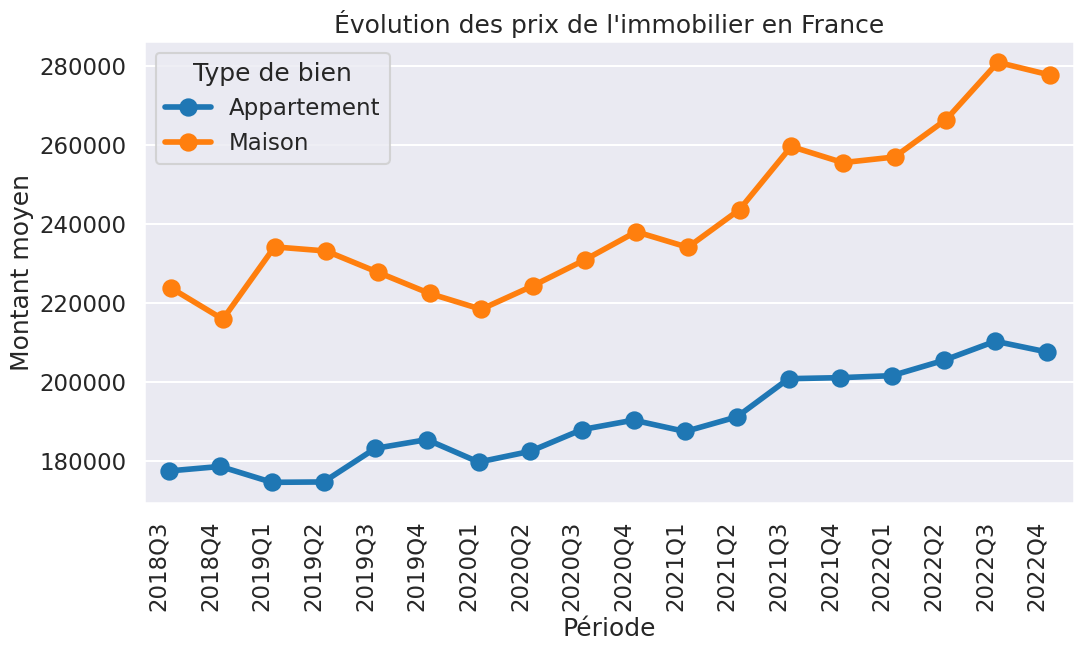

In [14]:
# Affichage avec seaborn
plt.figure(figsize=(12, 6))
ax = sns.pointplot(data=df_temp, x='Trimestre', y='MONTANT', hue='NAME_TYPE_BIEN', 
                   dodge=True, markers='o', linestyles='-')
plt.title("Évolution des prix de l'immobilier en France")
plt.xlabel("Période")
plt.ylabel("Montant moyen")
plt.legend(title='Type de bien')
plt.xticks(rotation=90, ha="right")
plt.show()

### Conclusion : le prix augmente en fonction du temps mais pas de manière linéaire ni cyclique

<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Visualisation des prix au niveau régionale</h1>
</div>
<br>

In [15]:
print(f"Il y a {df.Name_region.nunique()} region en France :")
liste_regions=df.Name_region.unique()
print(liste_regions)

Il y a 17 region en France :
['Auvergne-Rhône-Alpes' 'Nouvelle-Aquitaine' 'Hauts-de-France'
 'Centre-Val de Loire' 'Bourgogne-Franche-Comté' 'Bretagne' 'Normandie'
 "Provence-Alpes-Côte d'Azur" 'Corse' 'Occitanie' 'Pays de la Loire'
 'Grand Est' 'Île-de-France' 'Guadeloupe' 'Martinique' 'Guyane'
 'La Réunion']


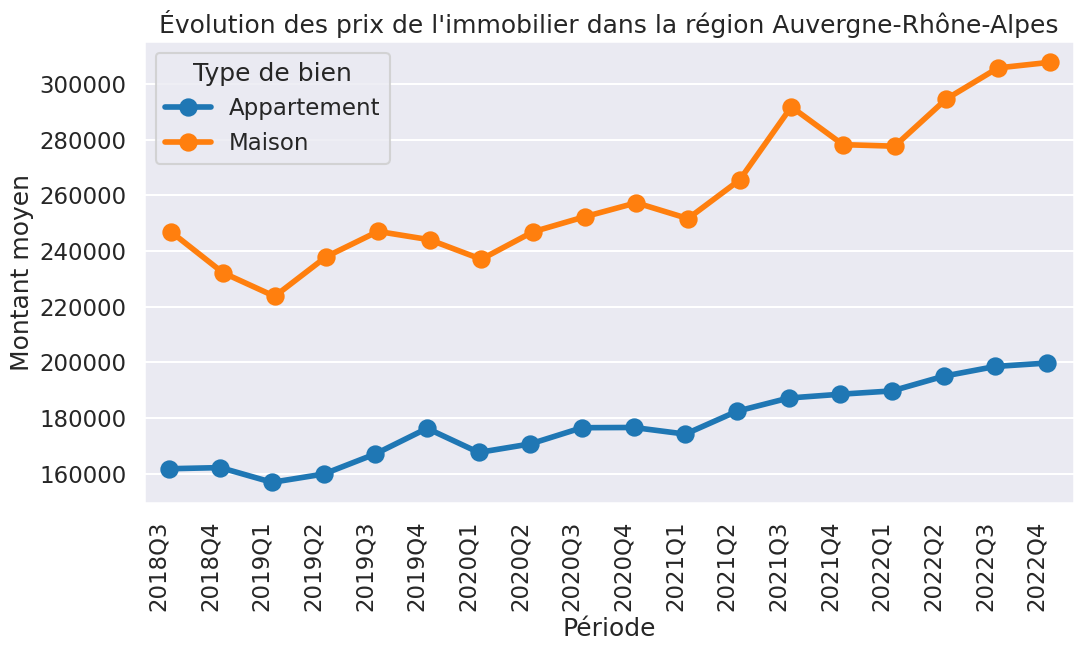

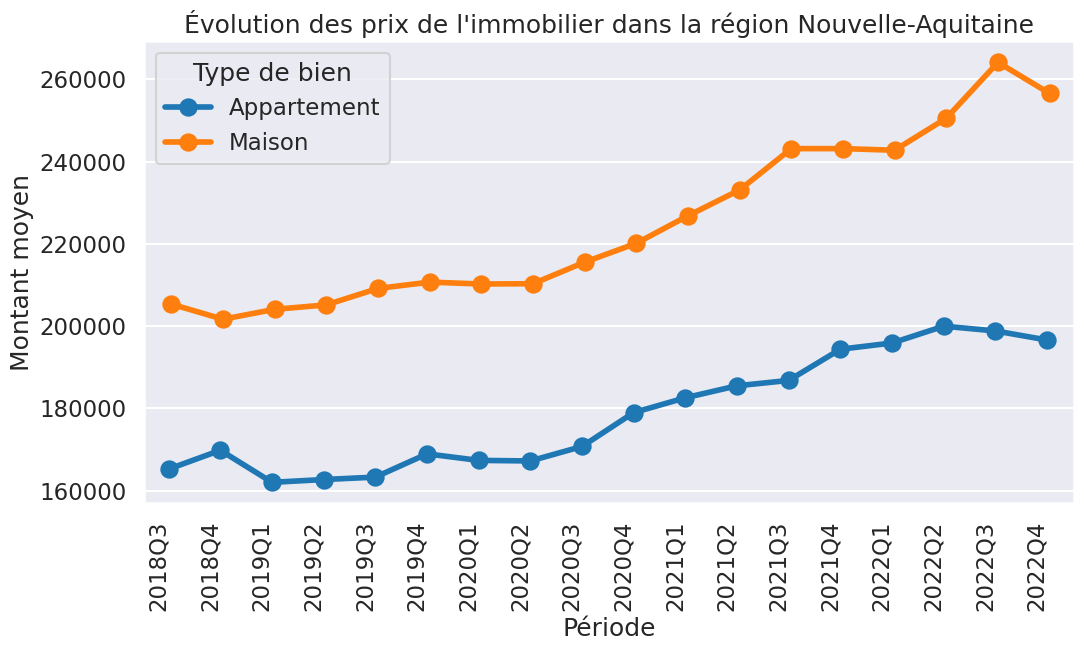

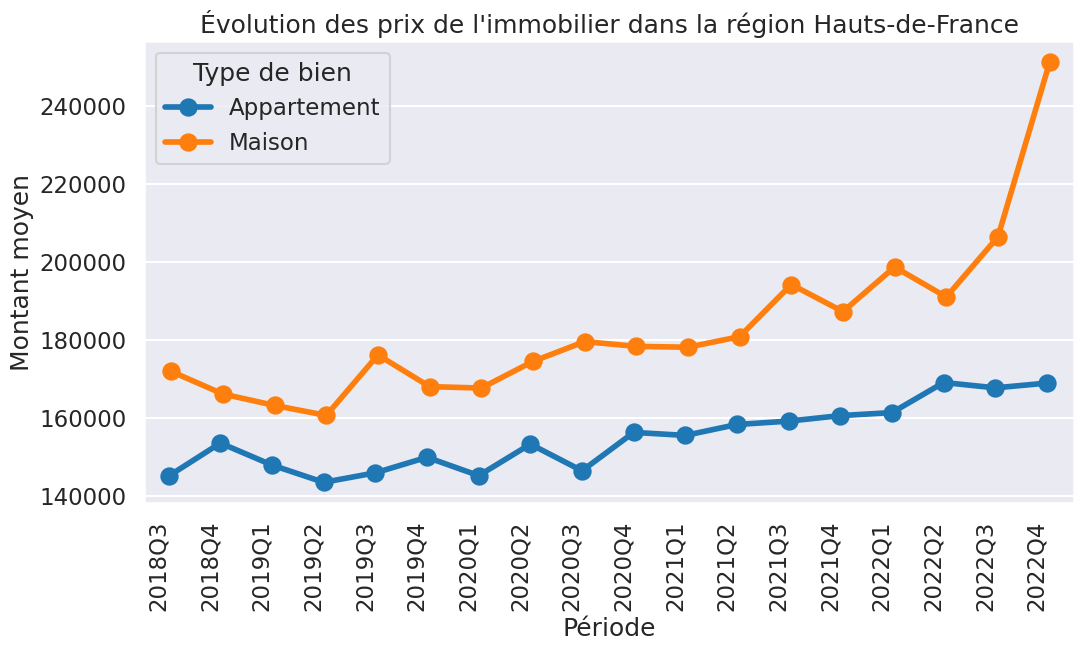

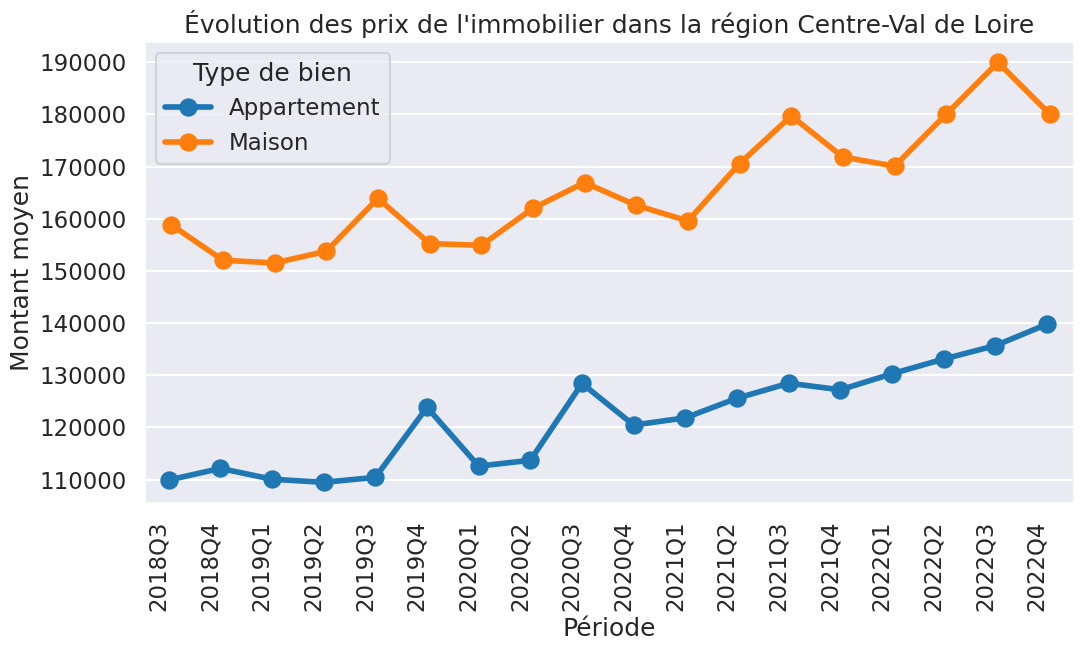

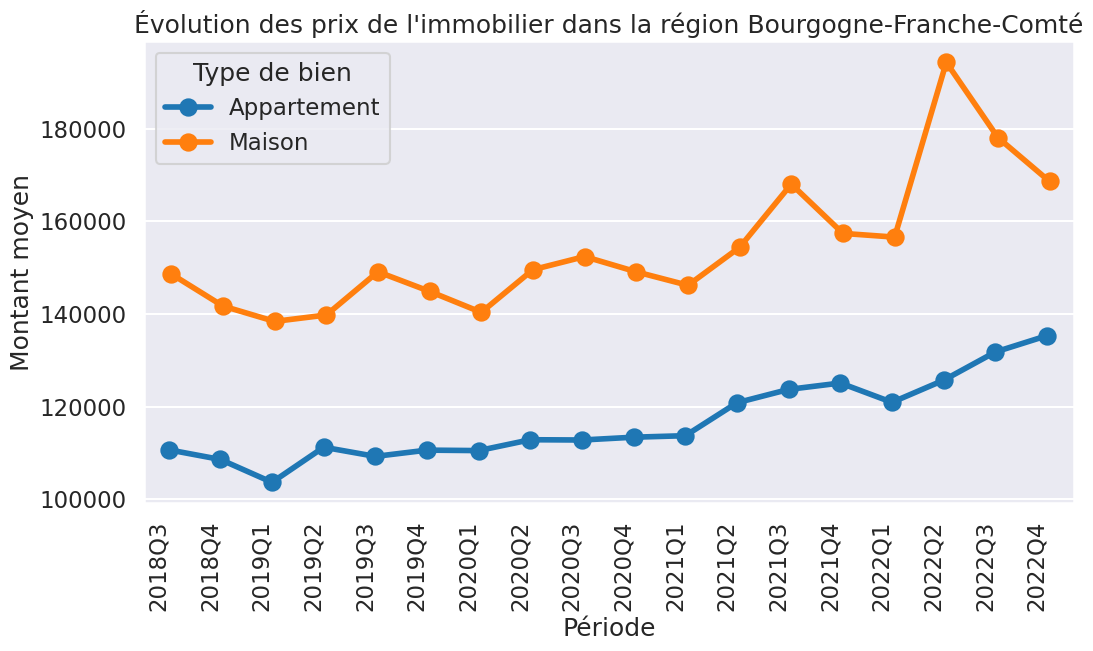

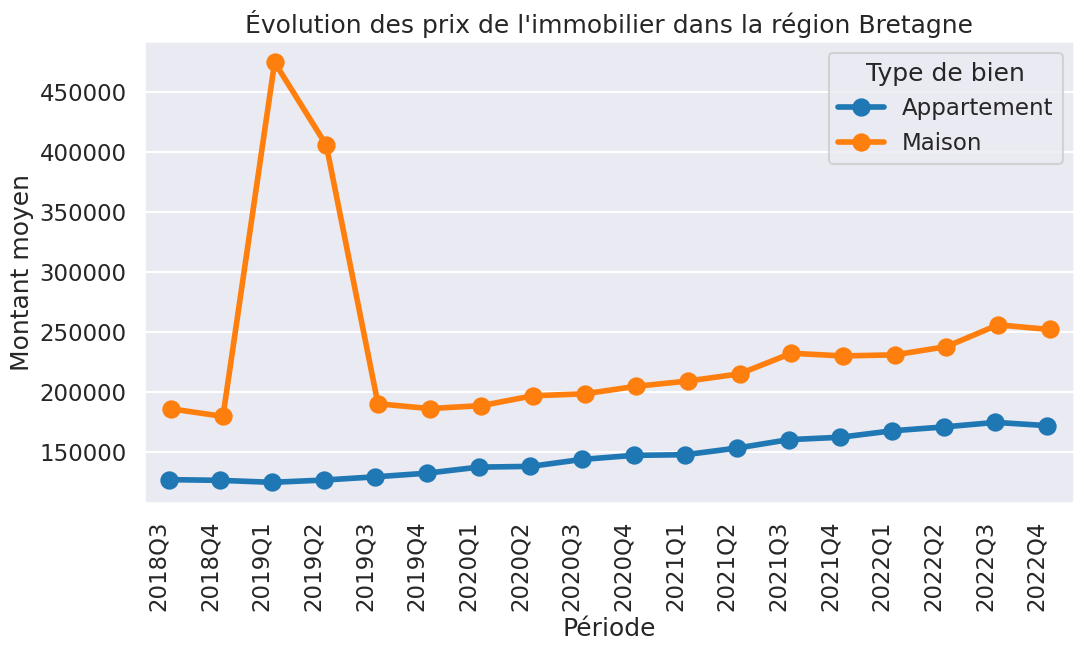

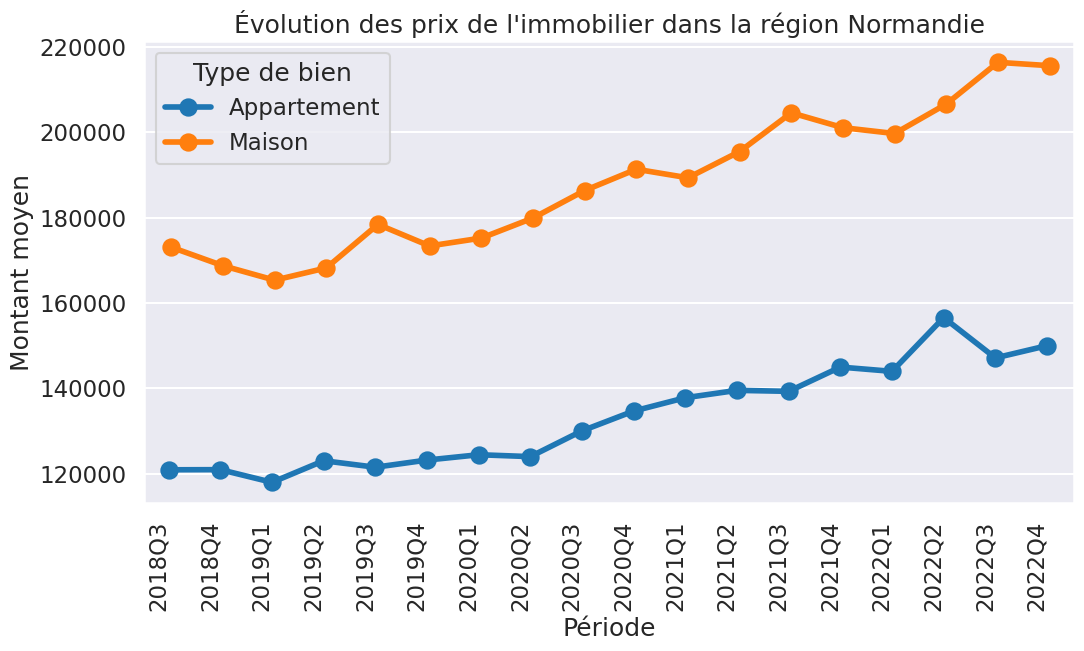

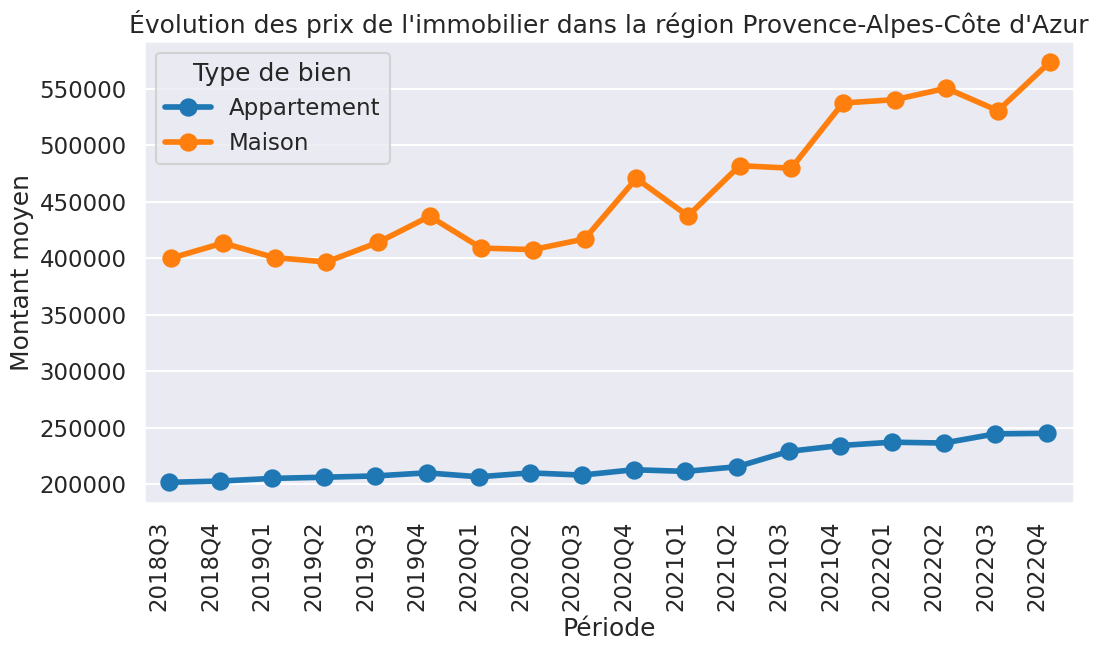

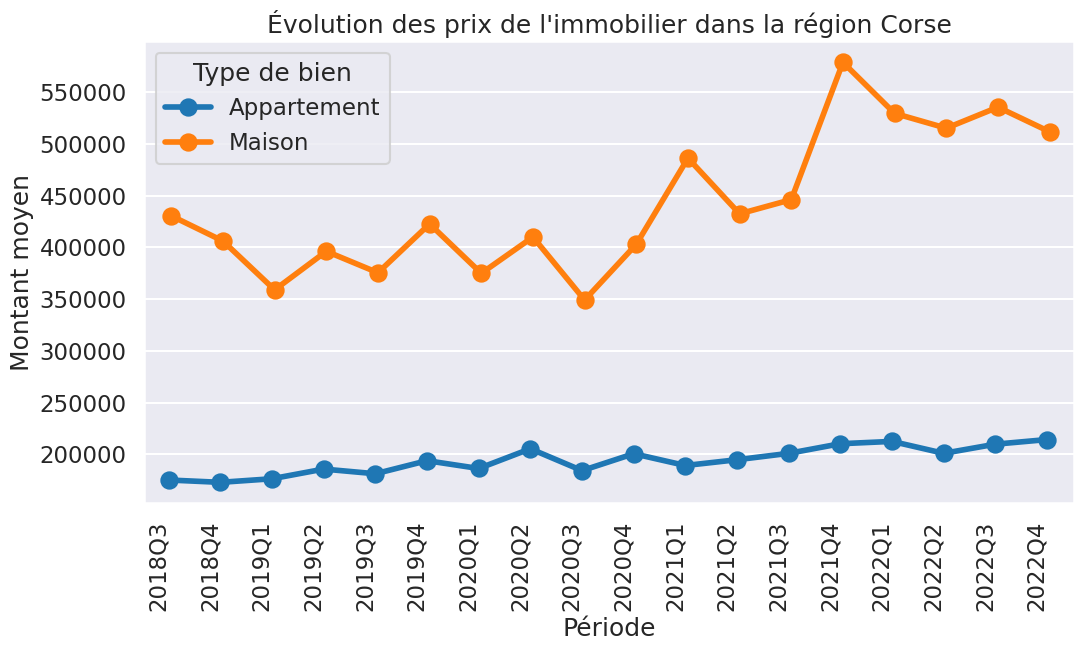

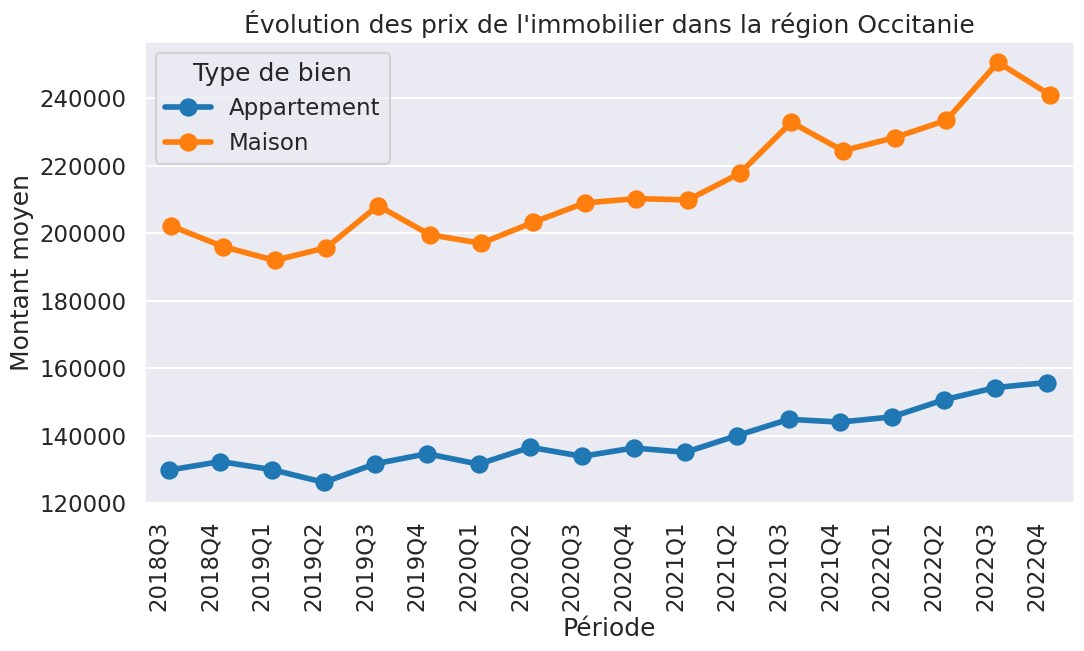

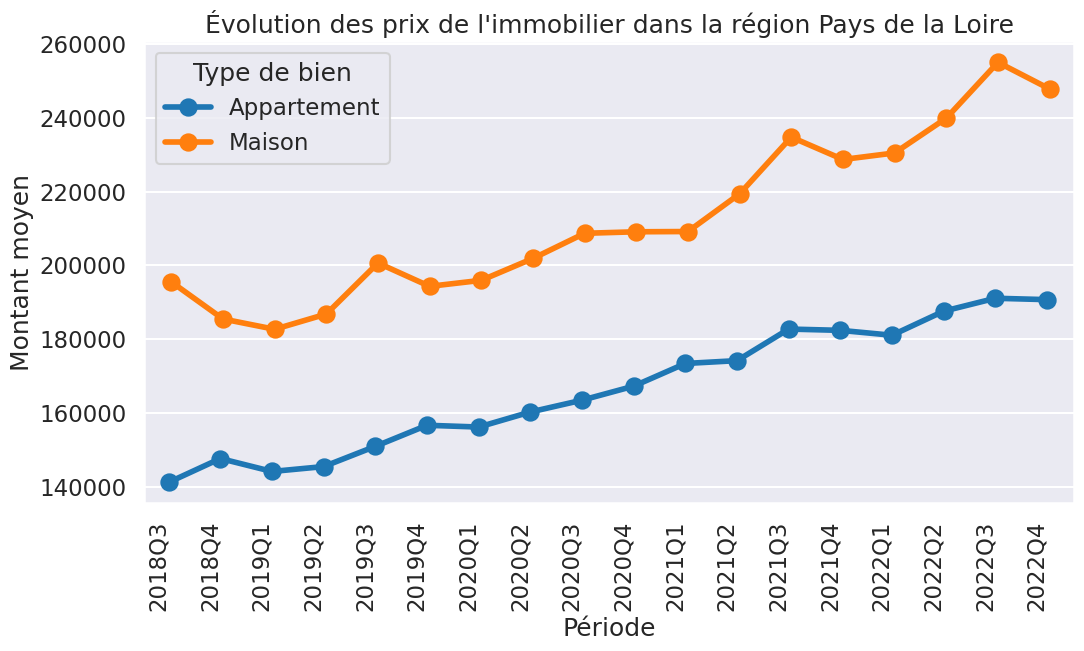

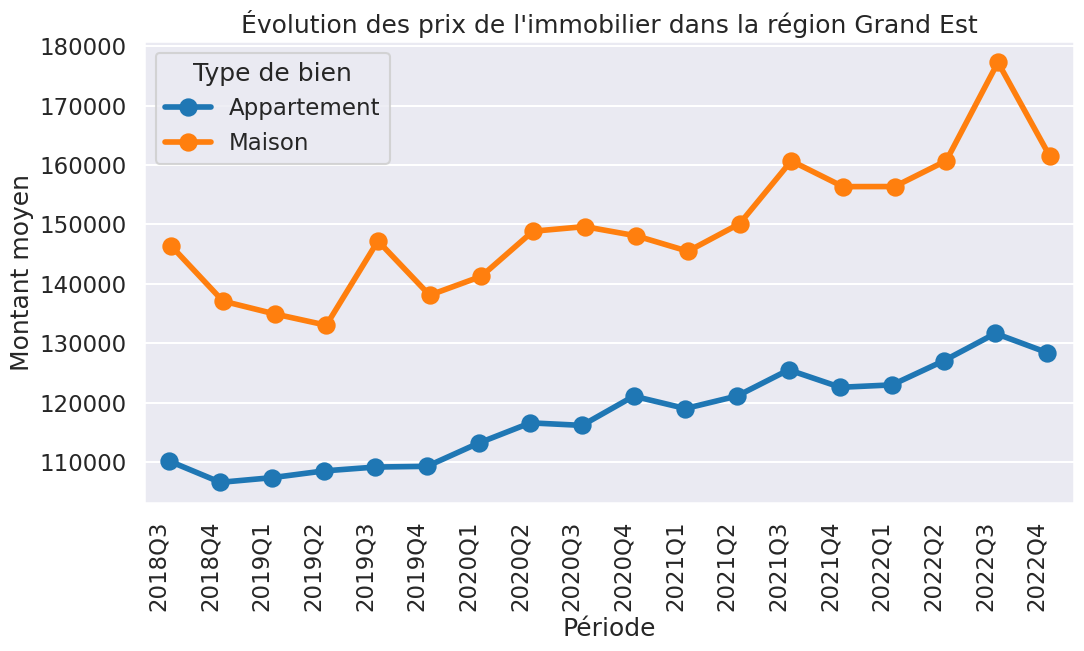

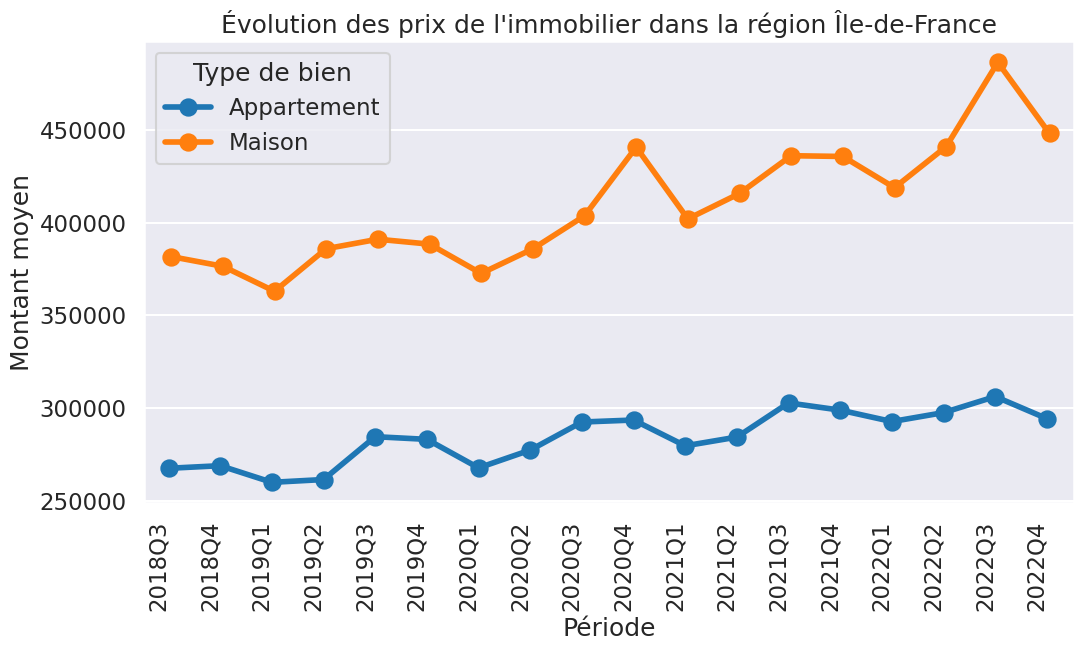

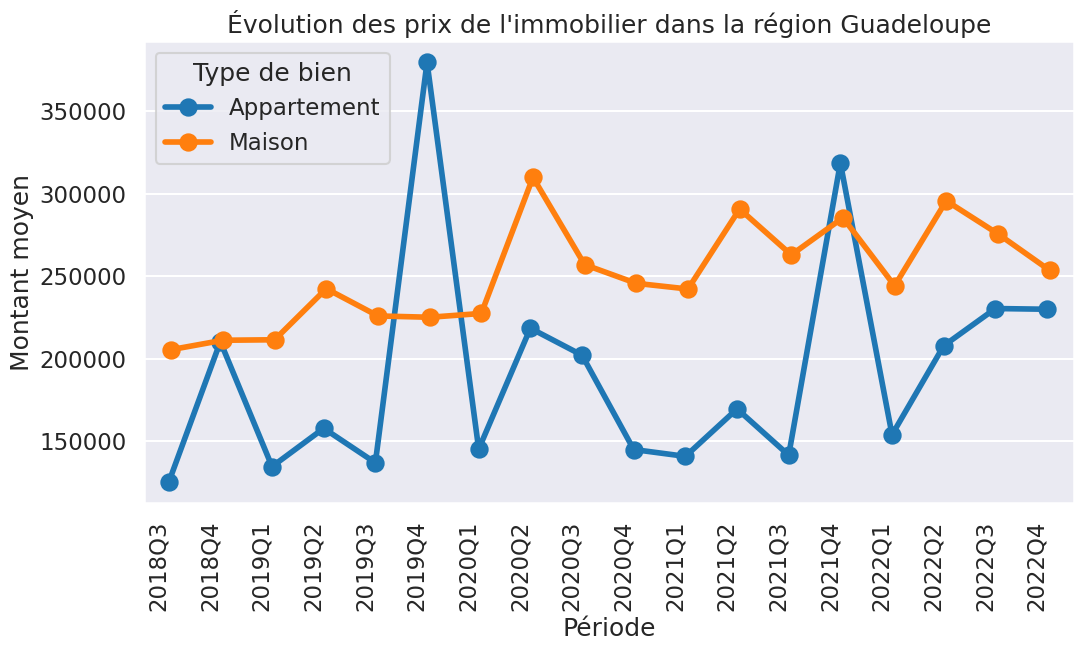

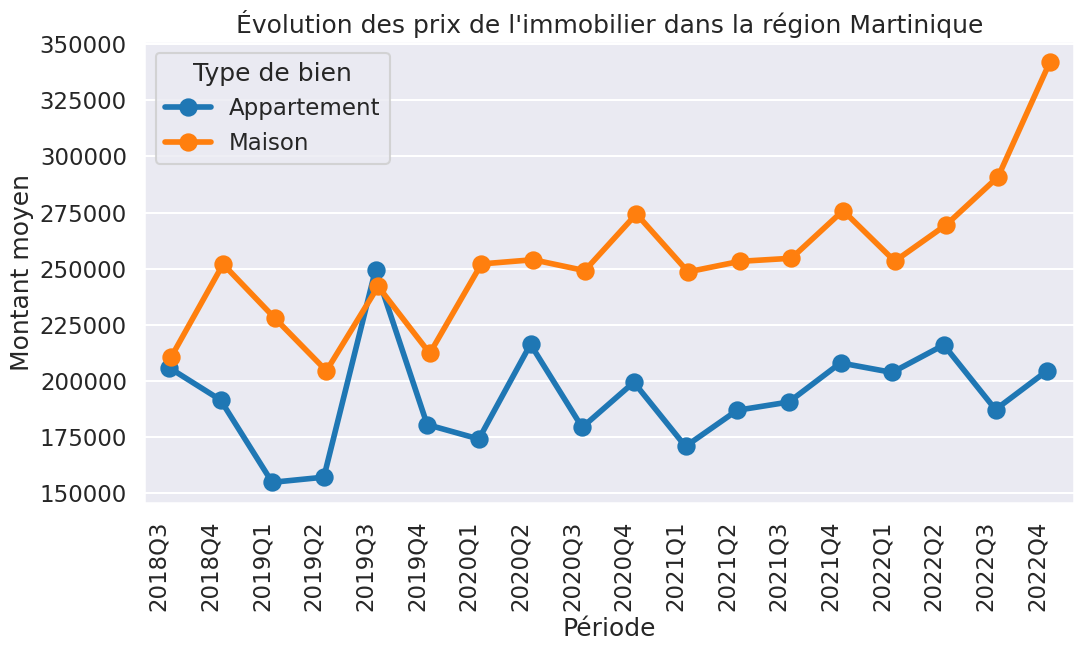

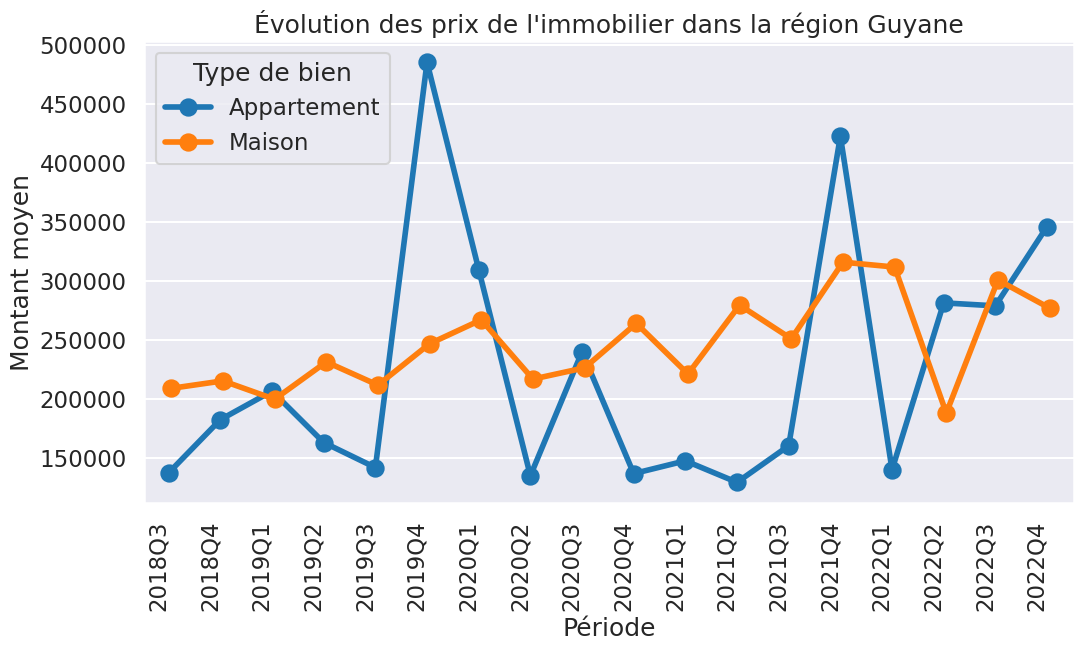

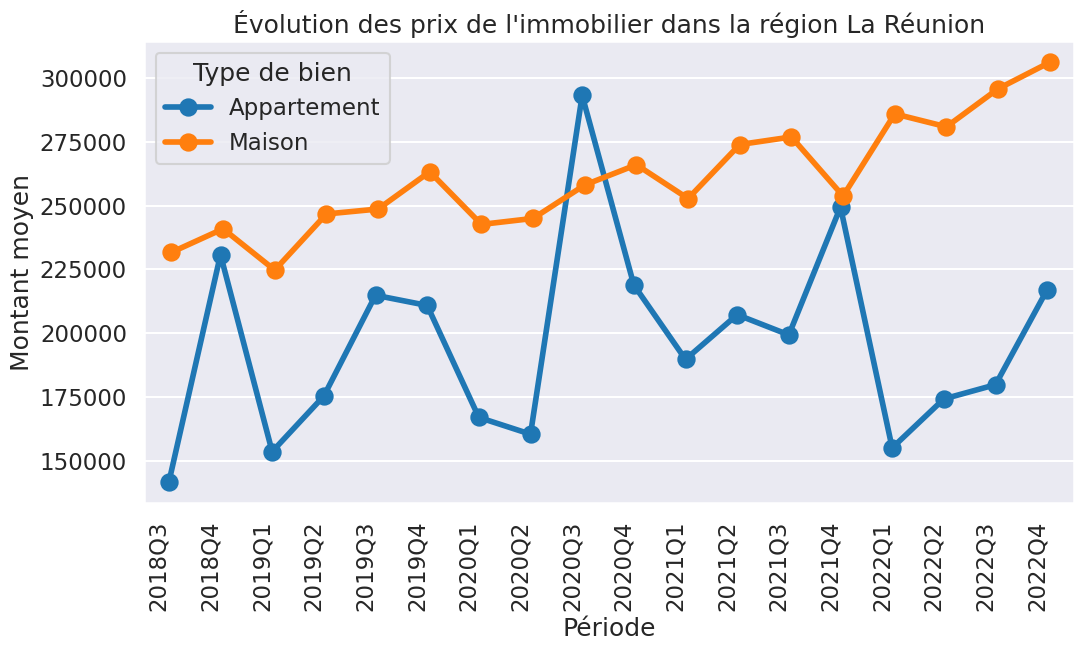

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for region in liste_regions:
    # Sélection des données
    df_temp = df.loc[df.Name_region == region,
                     ['Trimestre', 'NAME_TYPE_BIEN', 'MONTANT']]
    # Groupement sur la période et le type de bien, en ajoutant une colonne 'COUNT'
    df_temp = df_temp.groupby(['Trimestre', 'NAME_TYPE_BIEN']).agg(MONTANT=('MONTANT', 'mean'), COUNT=('MONTANT', 'count')).reset_index()
    # Tri du data frame par ordre croissant
    df_temp = df_temp.sort_values(by='Trimestre')


    # Création d'un nouveau graphique avec un axe y supplémentaire
    fig, ax= plt.subplots(figsize=(12, 6))
    

    # Premier graphique avec la première ligne
    sns.pointplot(data=df_temp, x='Trimestre', y='MONTANT', hue='NAME_TYPE_BIEN',
                  dodge=True, markers='o', linestyles='-', ax=ax)
    ax.set_title(f"Évolution des prix de l'immobilier dans la région {region}")
    ax.set_xlabel("Période")
    ax.set_ylabel("Montant moyen")
    ax.legend(title='Type de bien')
    ax.set_xticks(range(len(df_temp['Trimestre'].unique())))
    ax.set_xticklabels(df_temp['Trimestre'].unique(), rotation=90, ha="right")


    plt.show()


### Conclusion :
- Les prix moyen d'un bien est différent d'une région à l'autre  
=> La variable REGION peut être une variable intéressante pour la création d'un modèle
- Les prix peuvent également évoluer différemment entre un appartement et une maison  
=> Il sera préférable de faire un modèle pour les appartements et un modèle pour les maison